In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import pickle
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('clean_train.csv')
df.drop(df.columns[0],axis=1,inplace=True)
df_test = pd.read_csv('clean_test.csv')
df_loadid= pd.read_csv('test.csv')
df_test.drop(df.columns[0],axis=1,inplace=True)

In [3]:
df.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
0,1.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,1,0,0,1,1,0,0,0
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0


In [4]:
ll=df['Loan_Amount_Term'].median()+(df['Loan_Amount_Term'].std())
ul=df['Loan_Amount_Term'].median()-(df['Loan_Amount_Term'].std())
ll,ul

(424.428629067673, 295.571370932327)

In [5]:
df.drop((df.loc[df['CoapplicantIncome']>10000,]).index,axis=0,inplace=True)
df.drop((df.loc[df['ApplicantIncome']>10000,]).index,axis=0,inplace=True)
df.drop((df.loc[df['Loan_Amount_Term']>400,]).index,axis=0,inplace=True)

(array([  1.,   0.,   0.,   2.,   2.,   4.,   3.,  38.,   3., 490.]),
 array([2.48490665, 2.82502639, 3.16514613, 3.50526586, 3.8453856 ,
        4.18550534, 4.52562508, 4.86574482, 5.20586456, 5.54598429,
        5.88610403]),
 <a list of 10 Patch objects>)

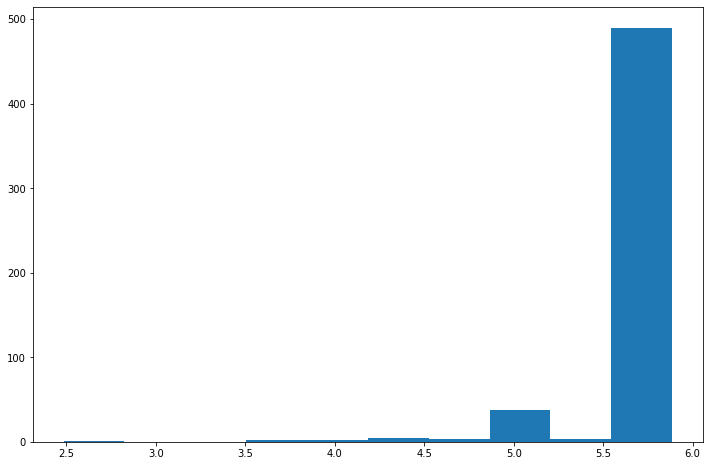

In [47]:
plt.figure(figsize=(12,8))
#plt.boxplot(df['Loan_Amount_Term'])
plt.hist(np.log(df['Loan_Amount_Term']))

In [6]:
len(df)


543

In [7]:
df.isnull().sum()
df=df.astype(float)

In [48]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']


In [49]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
scaled_x = scaler.fit_transform(X)
scaled_test =scaler.fit_transform(df_test)
scaled_x = pd.DataFrame(scaled_x)
scaled_test = pd.DataFrame(scaled_test)
scaled_x.columns=df.drop('Loan_Status',axis=1).columns
scaled_test.columns=df.drop('Loan_Status',axis=1).columns

In [12]:
df['Loan_Status'].value_counts()

1.0    386
0.0    171
Name: Loan_Status, dtype: int64

In [50]:

X_train, X_test, y_train, y_test = train_test_split(scaled_x.drop(['0','1','2','3+','Semiurban'],axis=1),y, train_size=0.7,test_size=0.3,random_state=100)

In [12]:
import statsmodels.api as sm
y_train=y_train.values.reshape(-1,1)
X1 = sm.add_constant(X_train)
est = sm.OLS(y_train, X1).fit()

est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     17.04
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           3.15e-27
Time:                        17:56:05   Log-Likelihood:                -155.14
No. Observations:                 380   AIC:                             334.3
Df Residuals:                     368   BIC:                             381.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0258      0.129      0.199      0.842      -0.228       0.280
Gender                0.0661      0.054      1.221      0.223      -0.040       0.172
Married               0.0101      0.044      0.231      0.818      -0.076       0.097
Education             0.0986      0.047      2.110      0.036       0.007       0.190
Self_Employed        -0.0521      0.059     -0.882      0.378      -0.168       0.064
ApplicantIncome       0.1415      0.133      1.063      0.288      -0.120       0.403
CoapplicantIncome     0.2217      0.121      1.830      0.068      -0.017       0.460
LoanAmount           -0.5516      0.237     -2.329      0.020      -1.017      -0.086
Loan_Amount_Term      0.0860      0.108      0.799      0.425      -0.126       0.298
Credit_History        0.7060      0.057     12.495      0.000       0.595       0.817
Rural                -0.1278      0.048     -2.655      0.008      -0.222      -0.033
Urban                -0.1172      0.046     -2.559      0.011      -0.207      -0.027
==============================================================================
Omnibus:                       73.786   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.771
Skew:                          -1.252   Prob(JB):                     3.25e-25
Kurtosis:                       3.924   Cond. No.                         30.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X=X_train
import sys

for i in range(0, len(X.columns)):
    y = X.loc[:, X.columns == X.columns[i]]
    x = X.loc[:, X.columns != X.columns[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "Variance Inflation Factor  {}  is {} \n".format(
            X.columns[i], vif)
        )


Variance Inflation Factor  Gender  is 6.3 

Variance Inflation Factor  Married  is 3.41 

Variance Inflation Factor  Education  is 4.57 

Variance Inflation Factor  Self_Employed  is 1.23 

Variance Inflation Factor  ApplicantIncome  is 9.56 

Variance Inflation Factor  CoapplicantIncome  is 2.6 

Variance Inflation Factor  LoanAmount  is 12.42 

Variance Inflation Factor  Loan_Amount_Term  is 12.76 

Variance Inflation Factor  Credit_History  is 6.82 

Variance Inflation Factor  Rural  is 1.86 

Variance Inflation Factor  Urban  is 1.85 



In [14]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X, y_train)


C:\Users\shahd\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = logsk.predict_proba(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred=y_pred.loc[:,1].map( lambda x: 1 if x > 0.5 else 0)
metrics.accuracy_score(y_pred,y_test)

0.803680981595092

In [127]:

scaled_df = scaler.fit_transform(df_test)
scaled_df = pd.DataFrame(scaled_df)


In [131]:
y_pred = logsk.predict_proba(scaled_df)
y_pred = pd.DataFrame(y_pred)
y_pred=y_pred.loc[:,1].map( lambda x: 1 if x > 0.5 else 0)
y_pred=pd.DataFrame(y_pred)

In [133]:
y_pred.to_csv('new_submission_logisticreg.csv',index=False)

In [129]:
y_pred

0      1
1      1
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    1
Name: 1, Length: 367, dtype: int64

In [16]:
pickle.dump(logsk,open('model.pkl','wb'))


model = pickle.load(open('model.pkl','rb'))

In [24]:
n=pd.Series([0,1,1,0,x10000,0,1000,,1,0,1])
n=n.values.reshape(-1,11)
logsk.predict_proba(n)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Rural', 'Urban'],
      dtype='object')

In [17]:
applicant_income_min = df['ApplicantIncome'].min()
applicant_income_max = df['ApplicantIncome'].max()
coapplicant_income_min = df['CoapplicantIncome'].min()
coapplicant_income_max = df['CoapplicantIncome'].max()
loan_amountmin = df['LoanAmount'].min()
loan_amount_max = df['LoanAmount'].max()
loan_amount_term_min = df['Loan_Amount_Term'].min()
loan_amount_term_max = df['Loan_Amount_Term'].max()

In [25]:
print(applicant_income_min,applicant_income_max,coapplicant_income_min ,coapplicant_income_max,loan_amountmin,
loan_amount_max,loan_amount_term_min,loan_amount_term_max)


150.0 10000.0 0.0 8980.0 9.0 480.0 12.0 360.0


In [27]:
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Urban
159,1.0,1.0,1.0,0.0,0.634518,0.80735,0.363057,1.0,0.0,0.0,1.0


In [24]:
n=(5849-applicant_income_min)/(applicant_income_max-applicant_income_min)
n

0.5785786802030457

In [53]:
n=[[1.0,1.0,1.0,0.0,0.634518,0.80735,0.363057,1.0,0.0,0.0,1.0]]
y=logsk.predict_proba(n)    

In [55]:
y[0,1]

0.1983994689815061

In [41]:
X.iloc[158,:]

Gender               1.000000
Married              1.000000
Education            1.000000
Self_Employed        0.000000
ApplicantIncome      0.467005
CoapplicantIncome    0.259800
LoanAmount           0.256900
Loan_Amount_Term     1.000000
Credit_History       1.000000
Rural                0.000000
Urban                1.000000
Name: 324, dtype: float64

In [51]:
X_train.head(1)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Urban
159,1.0,1.0,1.0,0.0,0.634518,0.80735,0.363057,1.0,0.0,0.0,1.0


In [52]:
y_train.head(1)

180    0.0
Name: Loan_Status, dtype: float64